Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Reading the file

In [8]:
df = pd.read_csv(r'C:\Users\vinay\OneDrive\Desktop\Imarticus\Projects\Vehicle Performance Prediction\Dataset\data.csv')

Understanding the Data

In [9]:
df.shape

(398, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Cleaning the data

In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
df = df[df['horsepower'] != "?"]

In [13]:
df = df.reset_index(drop = True)

In [14]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
df['horsepower'] = df['horsepower'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    int32  
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.2+ KB


Finding the relevant attributes by correlation factor

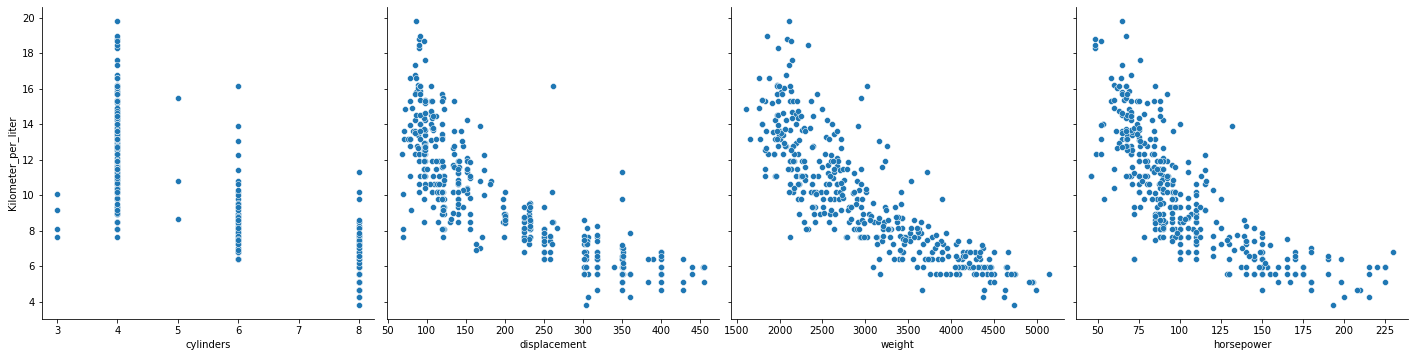

In [17]:
sns.pairplot(df, x_vars=['cylinders','displacement','weight','horsepower'], y_vars = 'Kilometer_per_liter', size=5, aspect=1, kind='scatter')
plt.show()

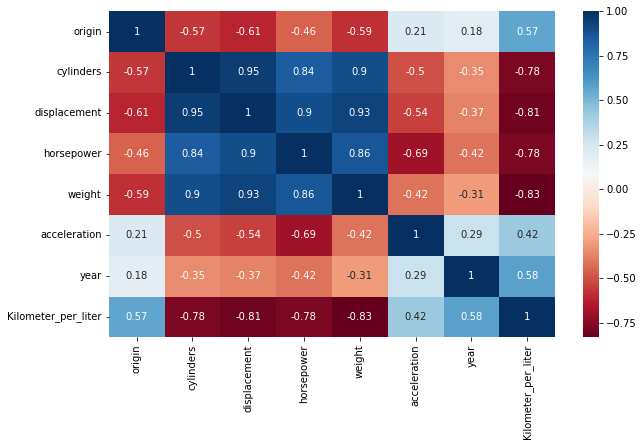

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap="RdBu",annot=True)
plt.show()

creating x and y

In [19]:
x = df['weight']
y = df['Kilometer_per_liter']

Splitting the data using train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 150)

In [21]:
x_train.head()

58     2254
176    2957
272    2830
322    2110
185    4215
Name: weight, dtype: int64

In [22]:
y_train.head()

58      9.778305
176     9.778305
272     8.630417
322    17.345863
185     7.440015
Name: Kilometer_per_liter, dtype: float64

In [23]:
x_train.shape

(274,)

In [24]:
y_train.shape

(274,)

Calling the model


In [25]:
  lr = LinearRegression()

In [26]:
x_train_sm = sm.add_constant(x_train)

Fitting the model

In [27]:
lr = sm.OLS(y_train,x_train_sm).fit()

In [28]:
x_train_sm.head()

,const,weight
58,1.0,2254
176,1.0,2957
272,1.0,2830
322,1.0,2110
185,1.0,4215


In [29]:
lr.params

const     19.665903
weight    -0.003269
dtype: float64

In [30]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.690
Model:                             OLS   Adj. R-squared:                  0.689
Method:                  Least Squares   F-statistic:                     605.5
Date:                 Thu, 08 Sep 2022   Prob (F-statistic):           3.86e-71
Time:                         13:47:55   Log-Likelihood:                -549.78
No. Observations:                  274   AIC:                             1104.
Df Residuals:                      272   BIC:                             1111.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6659      0.408     48.21

plotting the linear regression

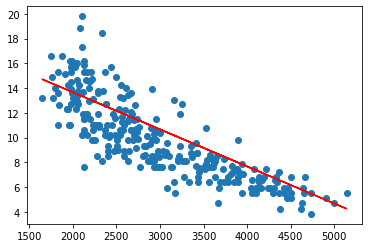

In [31]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 19.665 +(-0.003)*x_train, 'r')
plt.show()

Predictions on the Test Set

In [32]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

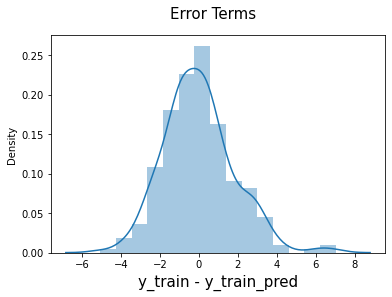

In [33]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Looking for patterns in the residuals

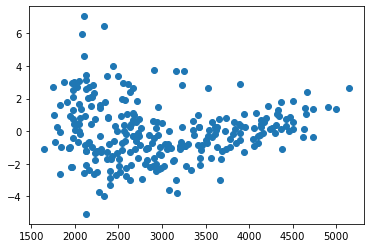

In [34]:
plt.scatter(x_train,res)
plt.show()

Step 5: Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [35]:
# Add a constant to X_test
X_test_sm = sm.add_constant(x_test)

In [36]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [37]:
y_pred.head()

139    12.412895
53     14.393662
111    12.115453
297     9.239091
90      5.074903
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [39]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.9233169698798753

Checking the R-squared on the test set

In [40]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6973024248355717

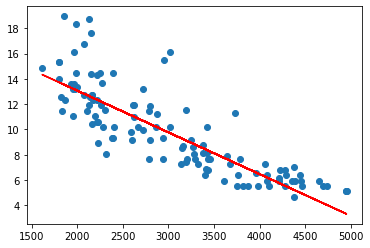

In [42]:
#Visualizing the fit on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, 19.665903+(-0.0033)* x_test, 'r')
plt.show()